## Customer Churn Classification Using ML Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# load the data and review
df = pd.read_csv('/content/drive/My Drive/Colab_Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Read & Explore Data

In [4]:
#load the data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.duplicated().sum()

0

In [8]:


df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
gender_count= df['gender'].value_counts()
gender_count

,count
gender,
Male,3555
Female,3488


In [10]:
churn_ratio = df['Churn'].value_counts(normalize=True)['Yes']
ratio_count= df['Churn'].value_counts()
print(ratio_count)

print(f"Churn Ratio: {churn_ratio:.2f}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn Ratio: 0.27


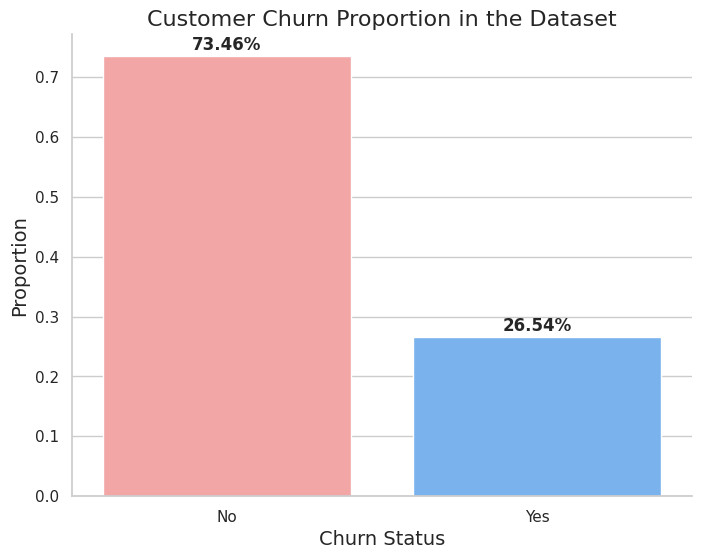

In [11]:
ratio_count= df['Churn'].value_counts()
churn_ratio = ratio_count / ratio_count.sum()

# Set up the plot style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create a bar plot for Churn ratios
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_ratio.index, y=churn_ratio.values, palette=["#FF9999", "#66B2FF"])

# Add value annotations
for index, value in enumerate(churn_ratio.values):
    plt.text(index, value + 0.01, f"{value:.2%}", ha='center', fontweight='bold')

# Set labels and title
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Customer Churn Proportion in the Dataset', fontsize=16)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()


## EDA

In [12]:
churned_customers = df[df['Churn'] == 'Yes']

In [13]:
churned_by_gender = churned_customers.groupby('gender').size().reset_index(name='Total Churned')

## Insights for customer Churn

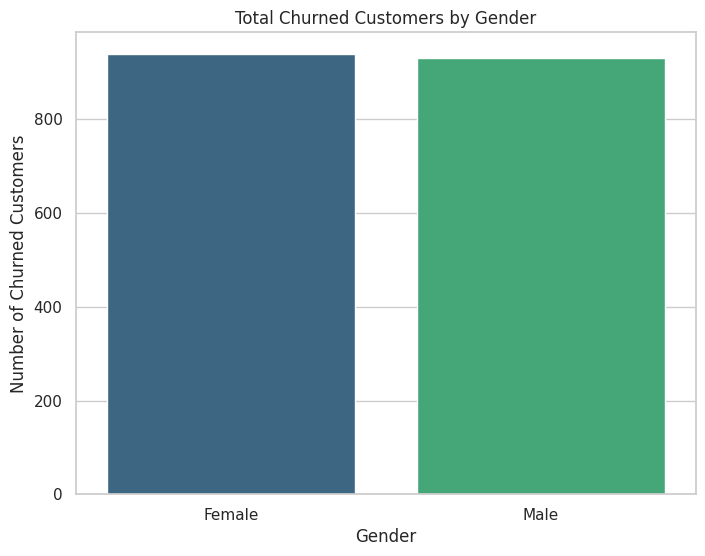

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='Total Churned', data=churned_by_gender, palette='viridis')
plt.title('Total Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.show()

In [15]:
churned_by_partner = churned_customers['Partner'].value_counts()

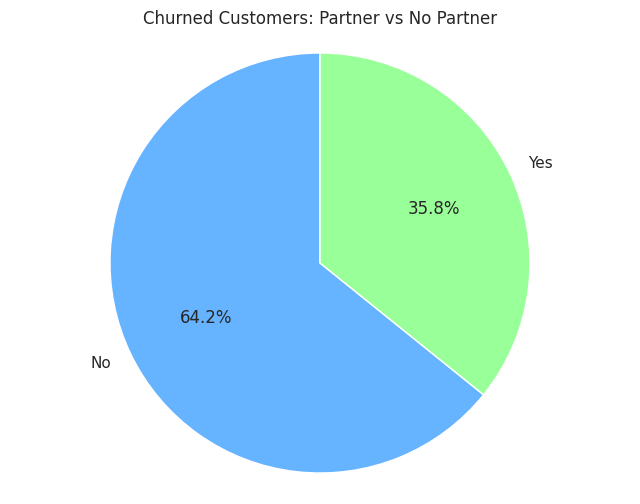

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(churned_by_partner, labels=churned_by_partner.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Churned Customers: Partner vs No Partner')
plt.axis('equal')
plt.show()


In [17]:
payment_count = churned_customers['PaymentMethod'].value_counts()
payment_count

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


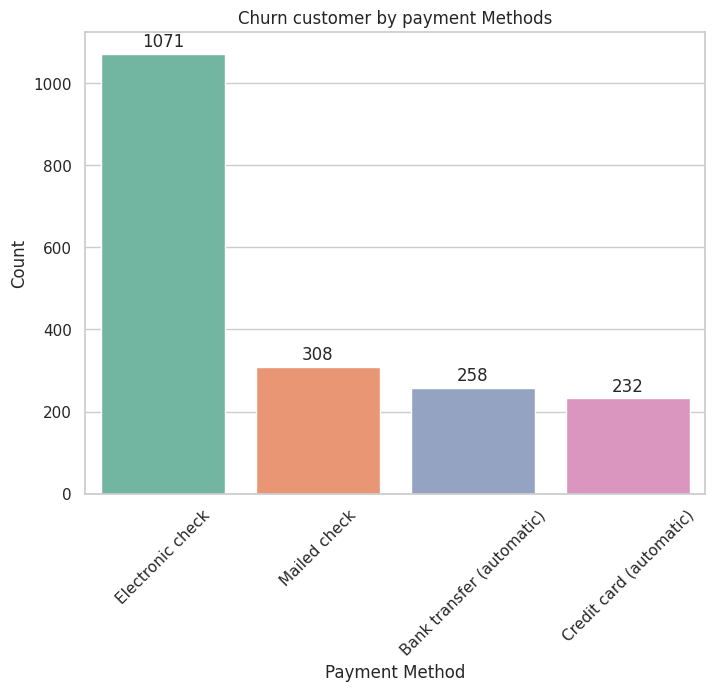

In [18]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=payment_count.index,y=payment_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Churn customer by payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [19]:
contract_count = churned_customers['Contract'].value_counts()
contract_count

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


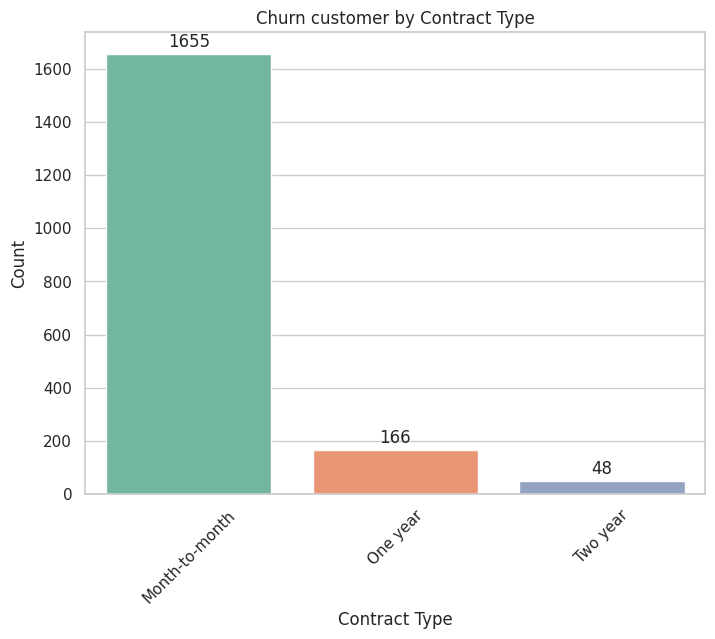

In [20]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=contract_count.index,y=contract_count.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.title('Churn customer by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
churned_customers['tenure'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72])

In [22]:
bins = [0, 6, 12, 18, 24, churned_customers['tenure'].max()]
labels = ['0-6 Months', '6-12 Months', '12-18 Months', '18-24 Months', '>24 Months']
churned_customers['tenure_group'] = pd.cut(churned_customers['tenure'], bins=bins, labels=labels)


In [23]:
grouped = churned_customers.groupby('tenure_group').size().reset_index(name='total_churned_customers')


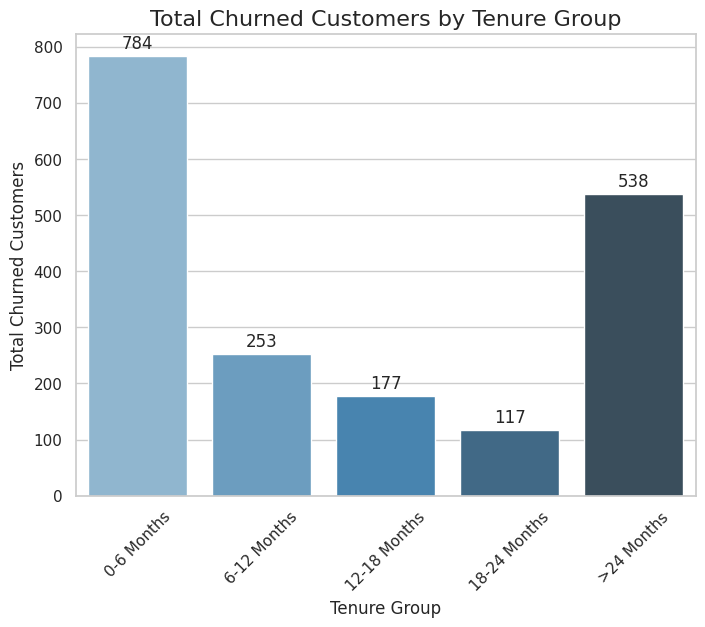

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='tenure_group', y='total_churned_customers', data=grouped, palette='Blues_d')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9),
                       textcoords='offset points')

plt.title('Total Churned Customers by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Total Churned Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [25]:
InternetService_count =  churned_customers['InternetService'].value_counts()
InternetService_count

,count
InternetService,
Fiber optic,1297
DSL,459
No,113


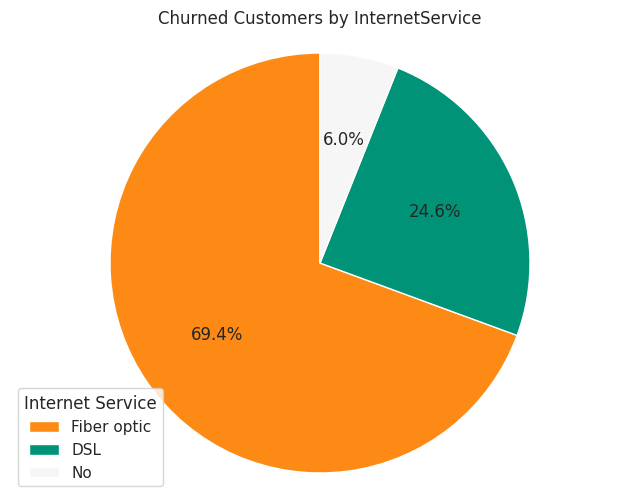

In [26]:
plt.figure(figsize=(8, 6))
plt.pie(InternetService_count, labels=None, autopct='%1.1f%%', colors=['#FC8A15','#009378','#F6F6F6'], startangle=90)
plt.legend(InternetService_count.index, title="Internet Service", loc="best")
plt.title('Churned Customers by InternetService')
plt.axis('equal')
plt.show()


In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [28]:
churned_customers = df[df['Churn'] == 'Yes']

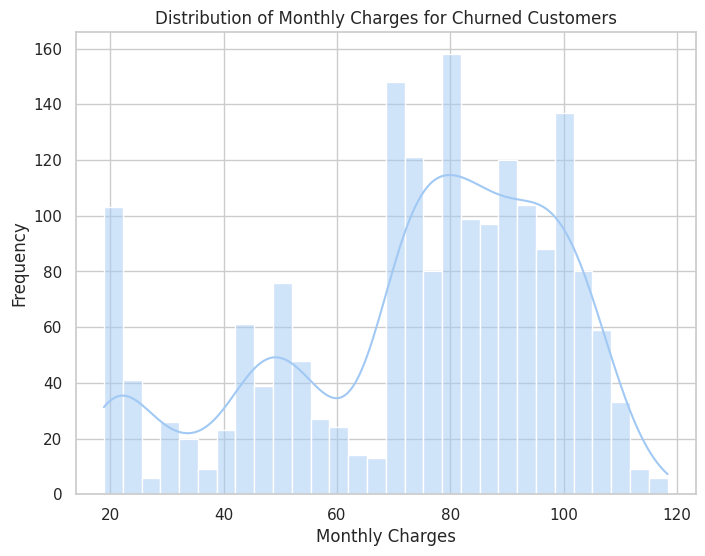

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

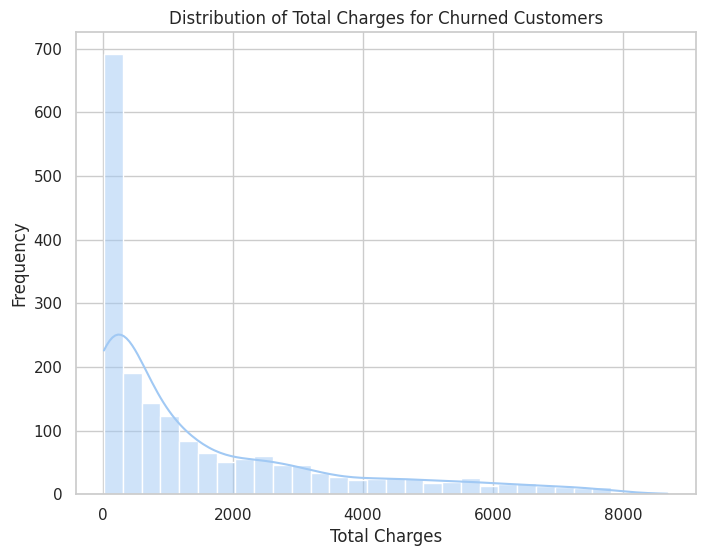

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges for Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

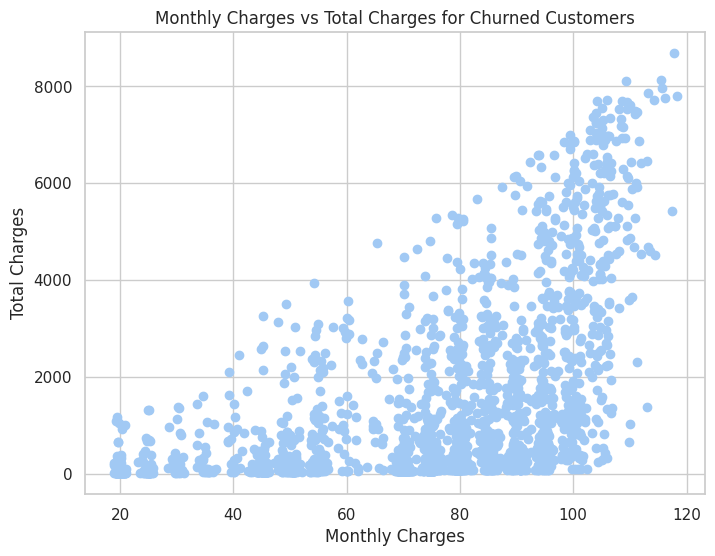

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])
plt.title('Monthly Charges vs Total Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

## Data Preprocessing

In [32]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [33]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [34]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

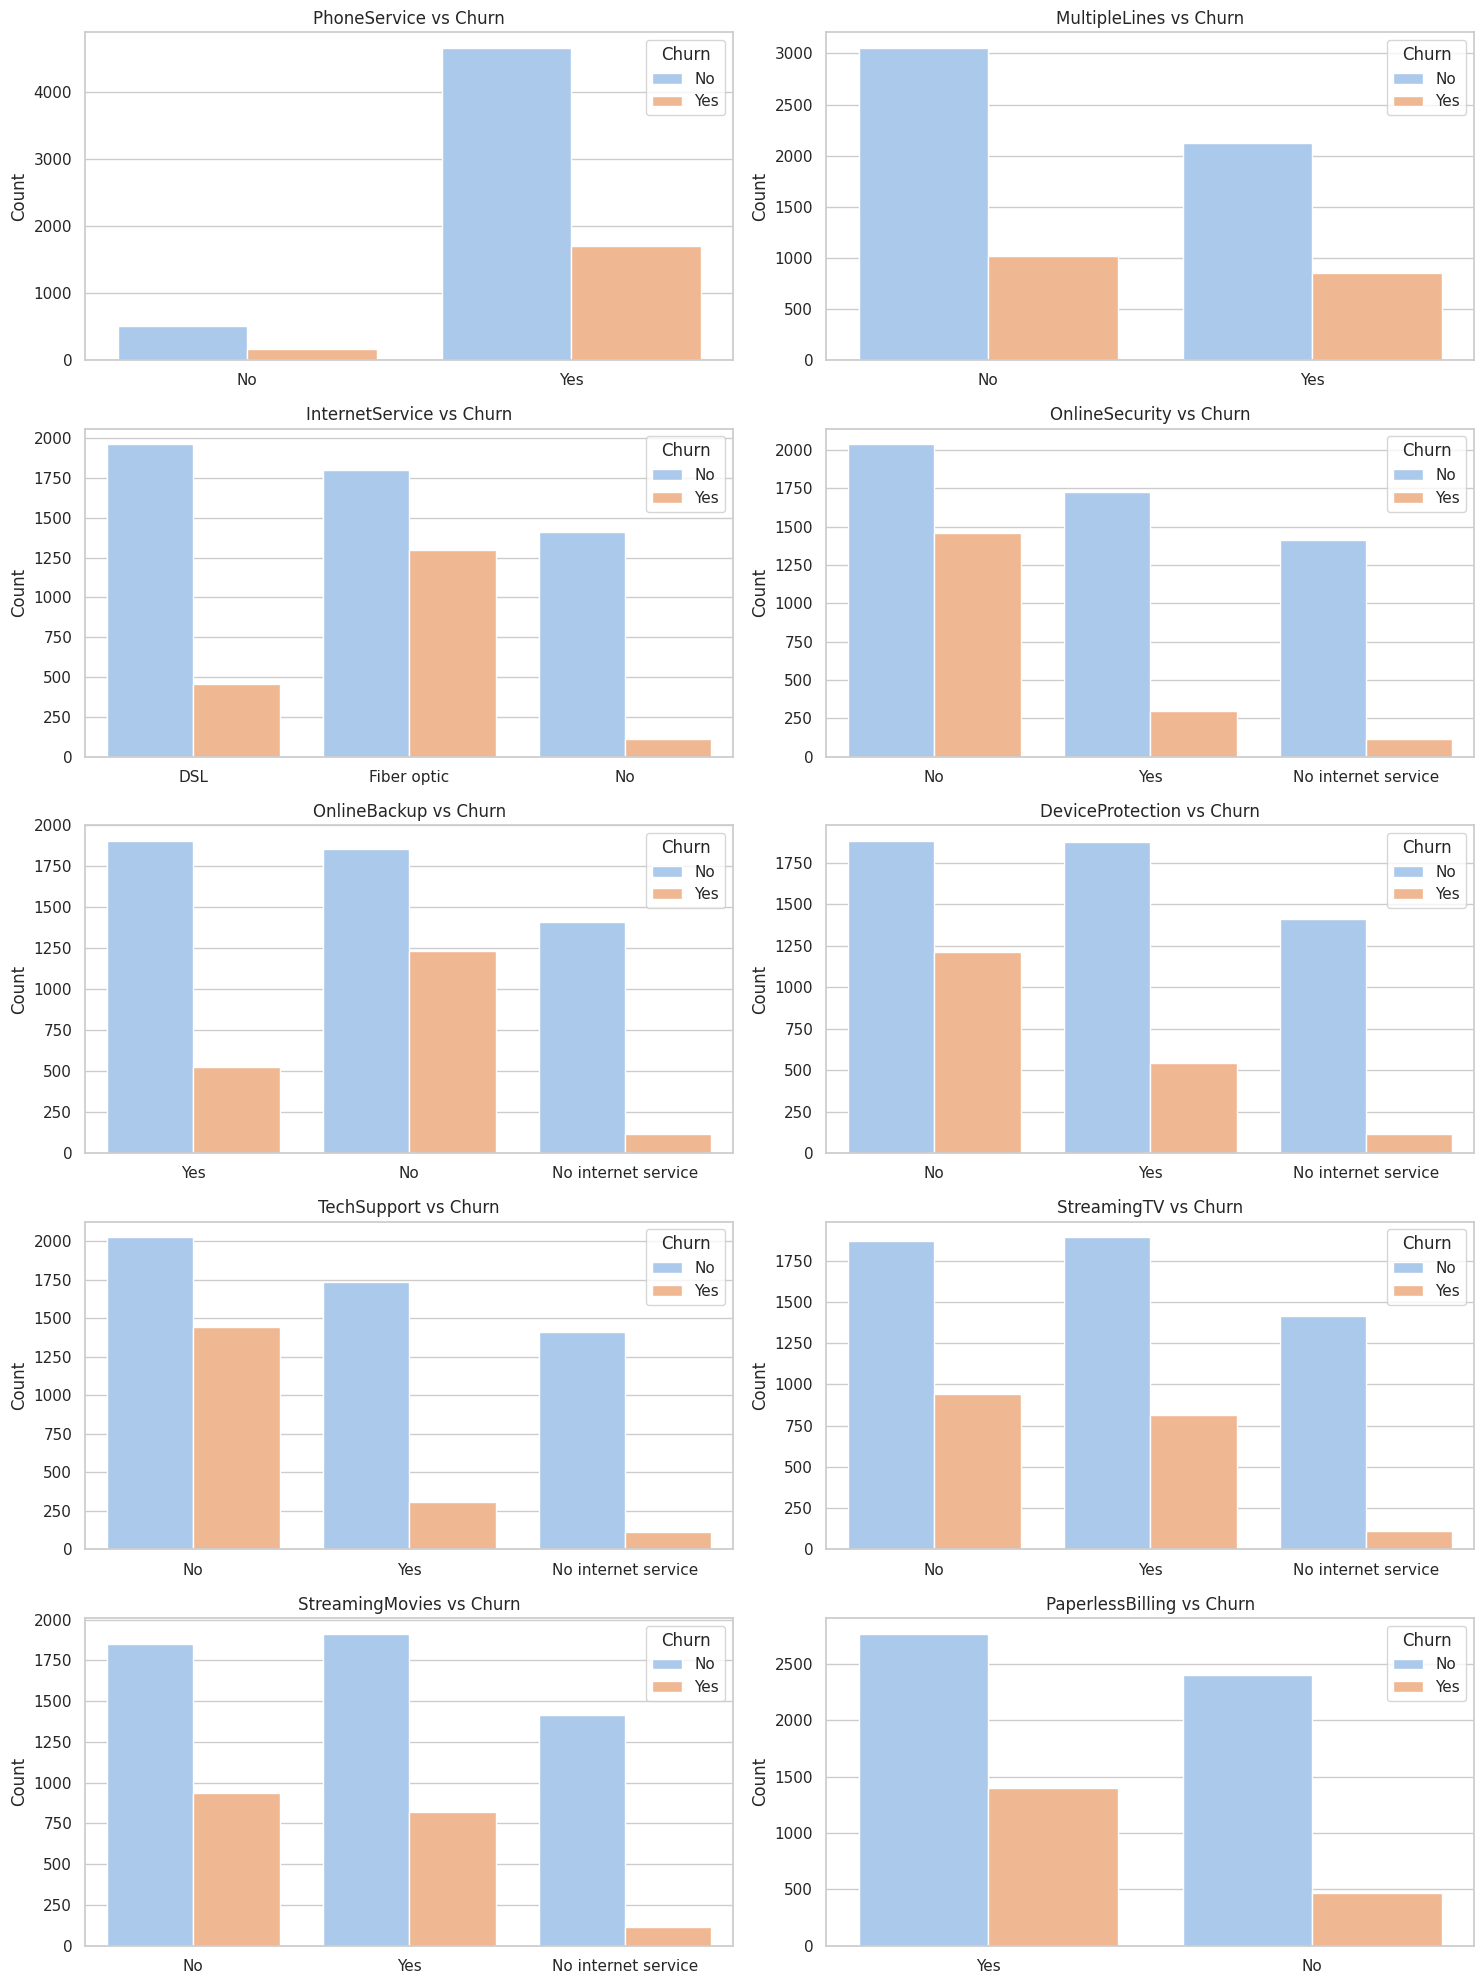

In [35]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(service_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [36]:
df.replace('No internet service', 'No', inplace=True)

In [37]:
df.drop('customerID',axis=1,inplace=True)

In [38]:
df.drop('TotalCharges', axis=1, inplace=True)

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [59]:
def replace_yes_no(df, columns):

    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "Churn"
]

replace_yes_no(df, columns_to_replace)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,Male,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,Male,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,Male,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [60]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

In [61]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
columns = ["MultipleLines", "Contract", "PaymentMethod", "InternetService"]

for column in columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [63]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


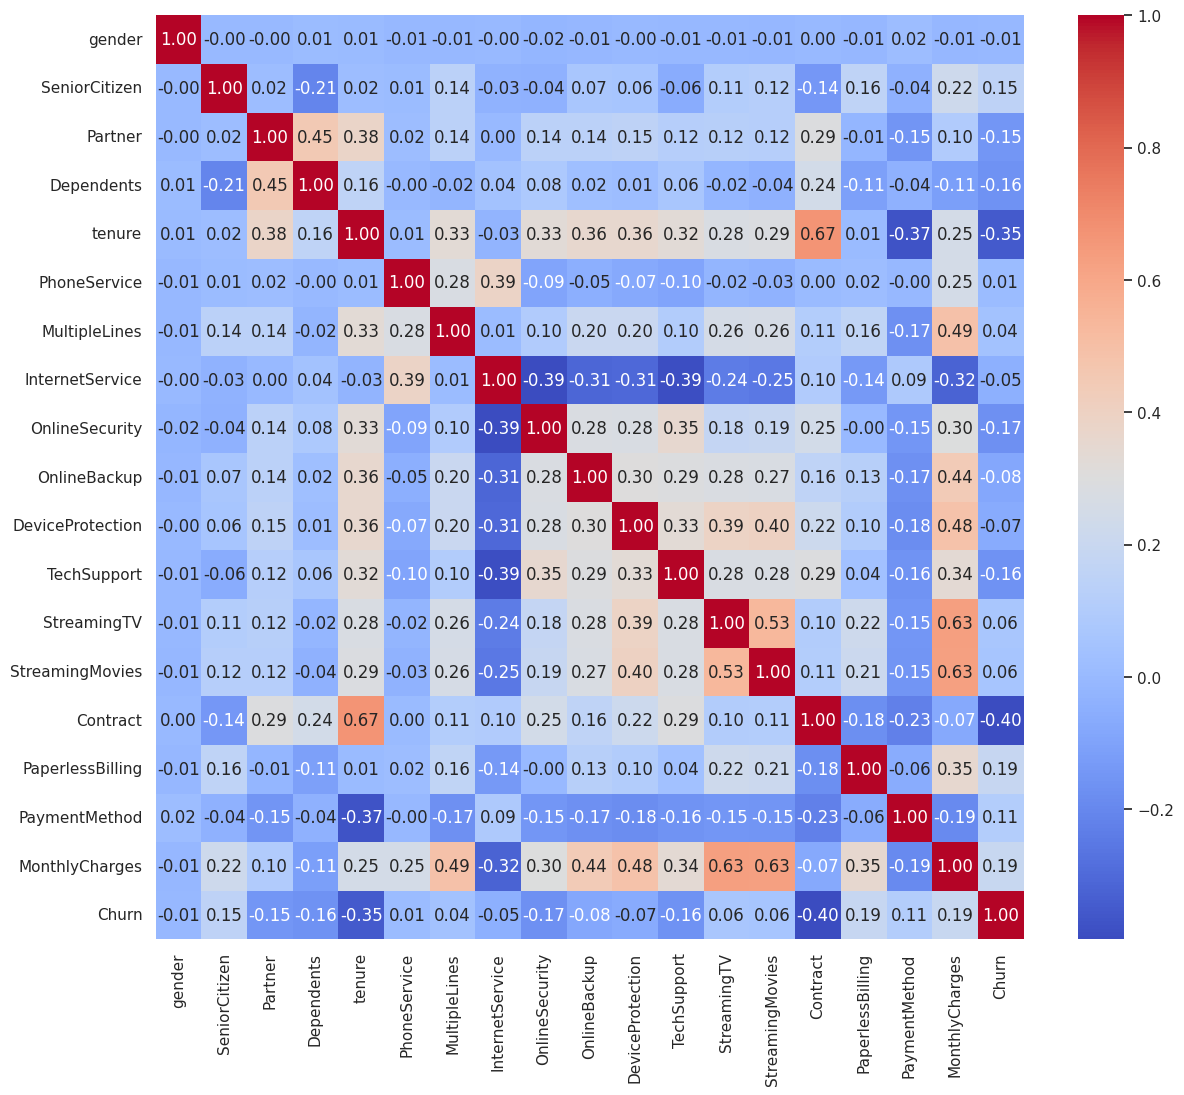

In [64]:
plt.figure(figsize=(14, 12))
corr2 = df.corr()
sns.heatmap(corr2, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## Build Models

In [65]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [68]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [69]:
 smote = SMOTE(random_state=42)
 X_res, y_res = smote.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [71]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)


    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')


    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

## LogisticRegression

In [72]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train ,y_train)

LogisticRegression(max_iter=1000, random_state=42)


Logistic Regression Results:
Logistic Regression Accuracy: 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1021
           1       0.81      0.84      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



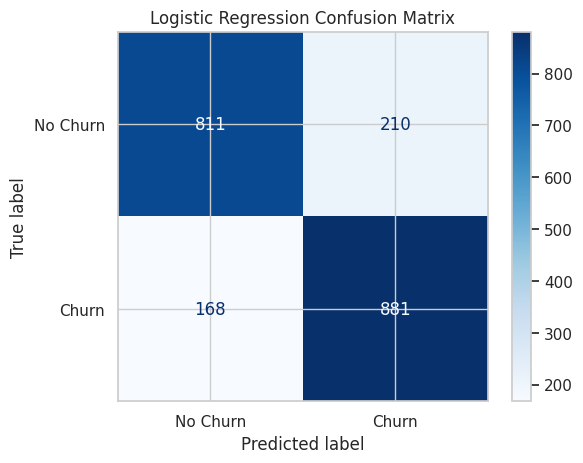

In [73]:
print("\nLogistic Regression Results:")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

## RandomForest

In [74]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Results:
Random Forest Accuracy: 0.84
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1021
           1       0.84      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



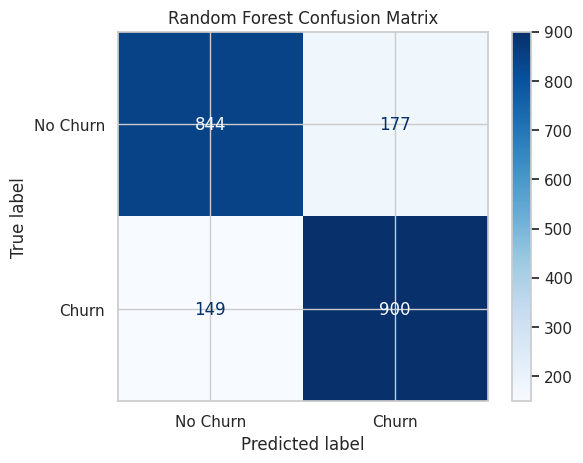

In [75]:
print("\nRandom Forest Results:")
evaluate_model(rf, X_test, y_test, "Random Forest")

## XGBoost

In [76]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


XGBoost Results:
XGBoost Accuracy: 0.84
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1021
           1       0.83      0.86      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



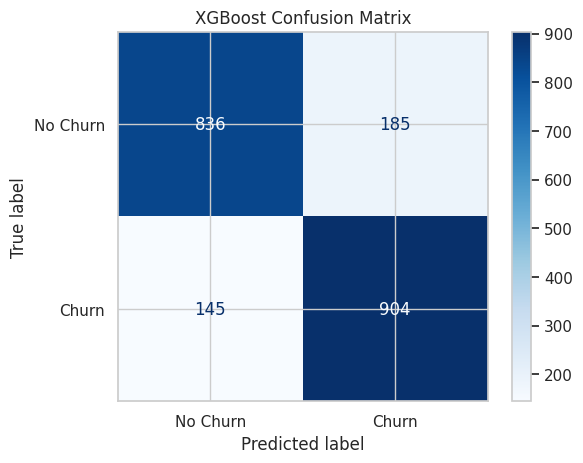

In [77]:
print("\nXGBoost Results:")
evaluate_model(xgb, X_test, y_test, "XGBoost")

## CatBoost

In [78]:
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)


CatBoost Results:
CatBoost Accuracy: 0.84
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1021
           1       0.82      0.87      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



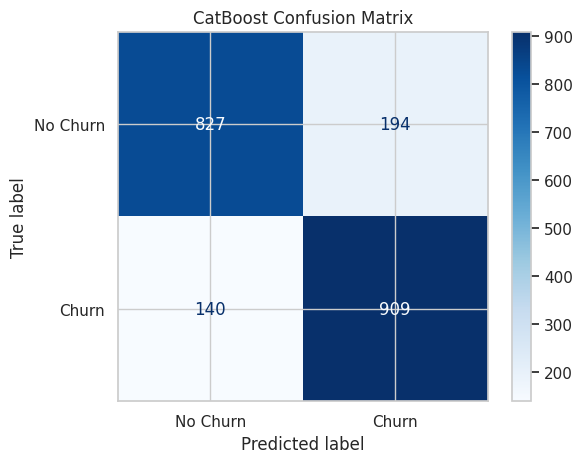

In [79]:
print("\nCatBoost Results:")
evaluate_model(catboost, X_test, y_test, "CatBoost")

## LightGBM

In [80]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765


LGBMClassifier(random_state=42)


LightGBM Results:
LightGBM Accuracy: 0.85
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1021
           1       0.83      0.87      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



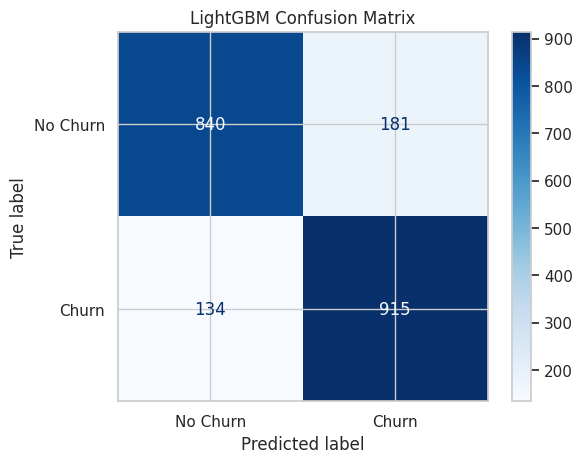

In [81]:
print("\nLightGBM Results:")
evaluate_model(lgbm, X_test, y_test, "LightGBM")